Task 1,2,3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the .csv file into a pandas DataFrame
data = pd.read_csv('camera_dataset.csv')

# Select the columns that have numeric and categoric data
#all_columns = data.select_dtypes(include=['float64', 'int64']).iloc[:, 1:]
numeric_columns = data.select_dtypes(include=['float64', 'int64']).iloc[:, 9:]
categoric_columns = data.select_dtypes(include=['float64', 'int64']).iloc[:, 0:9]

# Calculate the total num of values, percentage of missing values, cardinality, 1st and 3rd quartiles, min, max, average, median, standard deviation of each numeric column and store in a list of dictionaries
results = []

for column in numeric_columns.columns:
    numeric_data = numeric_columns[column]
    count = len(numeric_data.unique())
    numofrowsnum = len(numeric_data)
    missing = numeric_data.isna().mean() * 100
    q1 = np.nanquantile(numeric_data, 0.25)         # using nanquantile to ignore NaN (0) values
    q3 = np.nanquantile(numeric_data, 0.75)
    minimum = numeric_data.min()
    maximum = numeric_data.max()
    average = numeric_data.mean()
    median = numeric_data.median()
    std = numeric_data.std()
    results.append({'Column': column, 'TotNmVl': numofrowsnum, 'PercMiss %': missing, 'Cardinality': count, 'Min': minimum, 'Max': maximum, 'Q1': q1, 'Q3': q3, 'Average': average, 'Median': median, 'Standart Deviation': std})
    
# Print the results as a formatted table
print('\nNumeric type attribute calculations:\n')
print('{:<27}{:<15}{:<18}{:<15}{:<14}{:<15}{:<12}{:<15}{:<15}{:<15}{:<15}'.format('Column', 'TotNmVl', 'PercMiss %', 'Cardinality', 'Q1', 'Q3', 'Min', 'Max', 'Average', 'Median', 'Standart Deviation'))
for r in results:
    aver_str = '{:.4f}'.format(r['Average'])
    std_str =  '{:.4f}'.format(r['Standart Deviation'])
    percmiss_str = '{:.4f} %'.format(r['PercMiss %'])
    print('{:<27}{:<15}{:<18}{:<15}{:<14}{:<15}{:<12}{:<15}{:<15}{:<15}{:<15}'.format(r['Column'], r['TotNmVl'], percmiss_str, r['Cardinality'], r['Q1'], r['Q3'], r['Min'], r['Max'], aver_str, r['Median'], std_str))

# Calculate the total num of values, cardinality, percentage of missing values, mode, frequency of mode, percentage of mode, 2nd mode, frequency of 2nd mode, percentage of 2nd mode of each categoric column and store in a list of dictionaries
results1 = []

for column in categoric_columns.columns:
    categoric_data = categoric_columns[column]
    count = len(categoric_data.unique())
    numofrowscat = len(categoric_data)
    missing = categoric_data.isna().mean() * 100
    mode_values = categoric_data.mode().values
    mode1 = mode_values[0]
    freqmode1 = categoric_data.value_counts()[mode1] if mode1 is not None else None
    percmode1 = categoric_data.value_counts()[mode1] / len(categoric_data) * 100
    mode2_values = categoric_data[~categoric_data.isin(mode_values)].mode().values
    mode2 = mode2_values[0] if len(mode2_values) > 0 else None
    freqmode2 = categoric_data.value_counts()[mode2] if mode2 is not None else None
    percmode2 = freqmode2 / len(categoric_data) * 100 if mode2 is not None else None
    results1.append({'Column': column, 'TotNmVl': numofrowscat, 'PercMiss %': missing, 'Cardinality': count, 'Mode1': mode1, 'FreqMode1': freqmode1, 'PercMode1 %': percmode1, 'Mode2': mode2, 'FreqMode2': freqmode2, 'PercMode2 %': percmode2})

# Print the results as a formatted table
print('\nCategoric type attribute calculations:\n')
print('{:<27}{:<15}{:<18}{:<15}{:<14}{:<15}{:<25}{:<15}{:<17}{:<15}'.format('Column', 'TotNmVl', 'PercMiss %', 'Cardinality', 'Mode1', 'FreqMode1', 'PercMode1 %', 'Mode2', 'FreqMode2', 'PercMode2 %'))
for r in results1:
    mode2_str = str(r['Mode2']) if r['Mode2'] is not None else 'N/A'
    mode2_freq_str = str(r['FreqMode2']) if r['FreqMode2'] is not None else 'N/A'
    mode2_perc_str = '{:.4f} %'.format(r['PercMode2 %']) if r['PercMode2 %'] is not None else 'N/A'
    mode1_perc_str = '{:.4f} %'.format(r['PercMode1 %']) if r['PercMode1 %'] is not None else 'N/A'
    percmiss_str = '{:.4f} %'.format(r['PercMiss %'])
    print('{:<27}{:<15}{:<18}{:<15}{:<14}{:<15}{:<25}{:<15}{:<17}{:<15}'.format(r['Column'], r['TotNmVl'], percmiss_str, r['Cardinality'], r['Mode1'], r['FreqMode1'], mode1_perc_str, mode2_str, mode2_freq_str, mode2_perc_str))



Numeric type attribute calculations:

Column                     TotNmVl        PercMiss %        Cardinality    Q1            Q3             Min         Max            Average        Median         Standart Deviation
Weight (inc. batteries)    1038           0.1927 %          238            180.0         350.0          0.0         1860.0         319.2654       226.0          260.4101       
Dimensions                 1038           0.1927 %          102            92.0          115.0          0.0         240.0          105.3634       101.0          24.2628        
Price                      1038           0.0000 %          43             149.0         399.0          14          7999           457.3844       199.0          760.4529       

Categoric type attribute calculations:

Column                     TotNmVl        PercMiss %        Cardinality    Mode1         FreqMode1      PercMode1 %              Mode2          FreqMode2        PercMode2 %    
Release date               1038 

Task 4

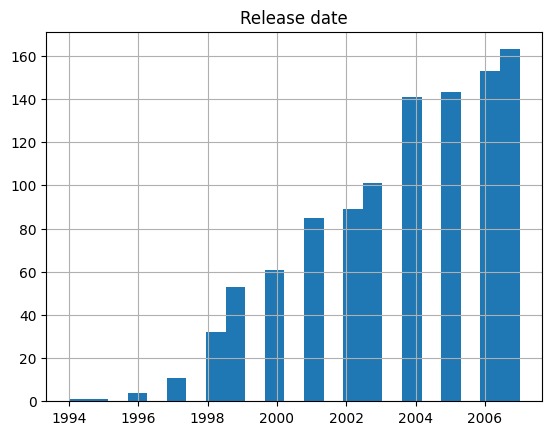

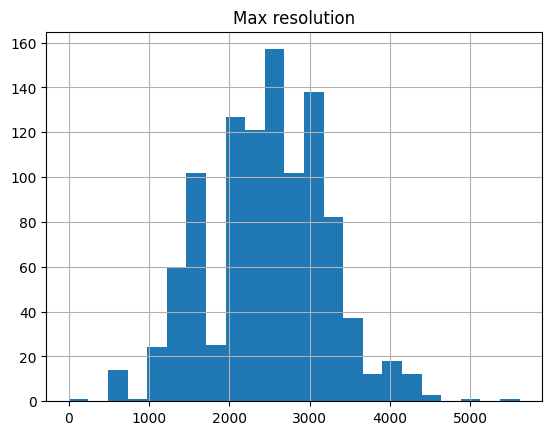

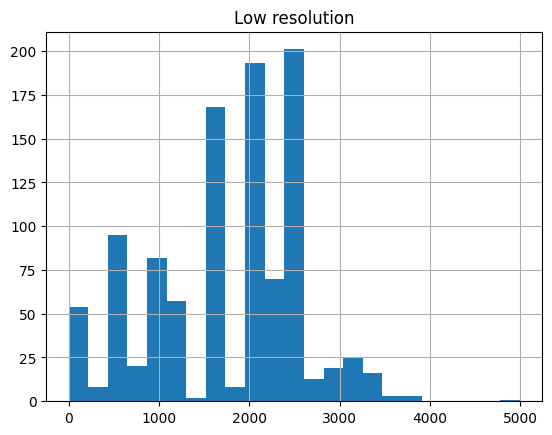

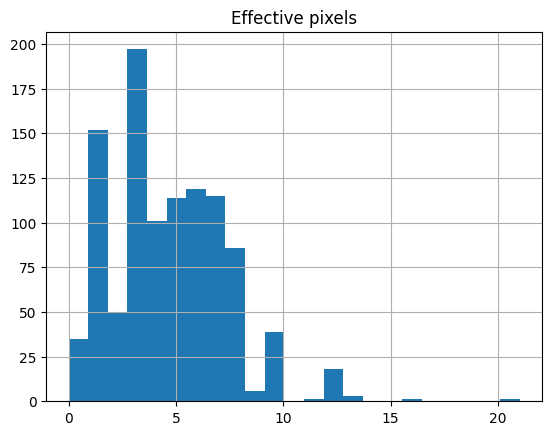

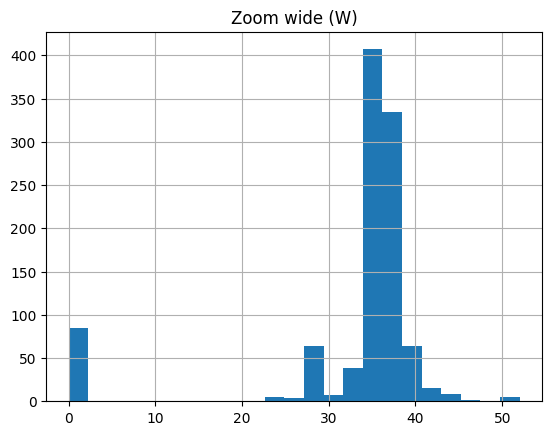

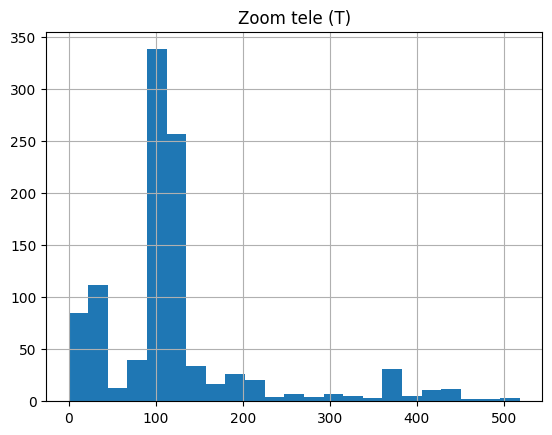

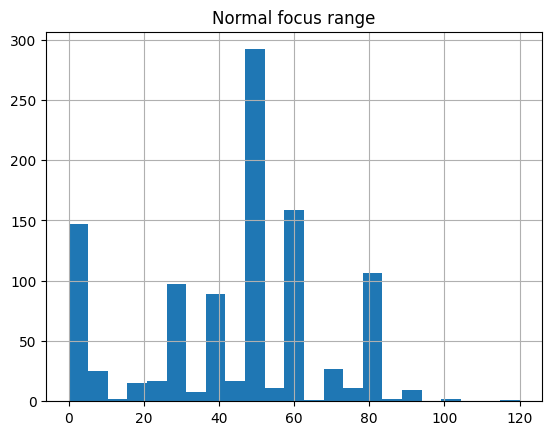

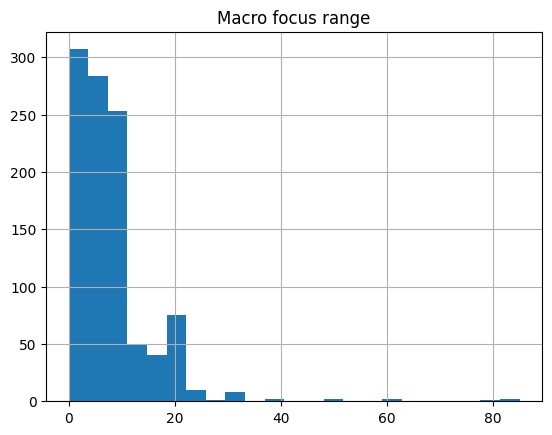

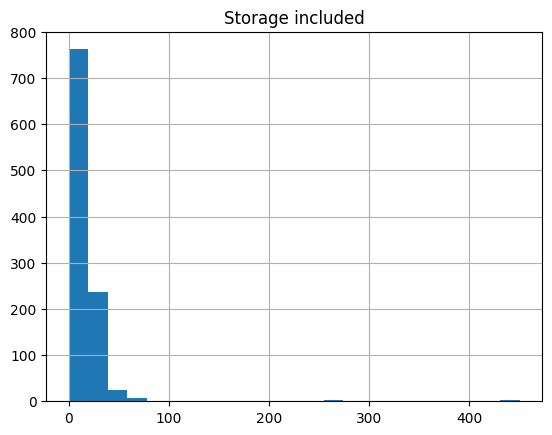

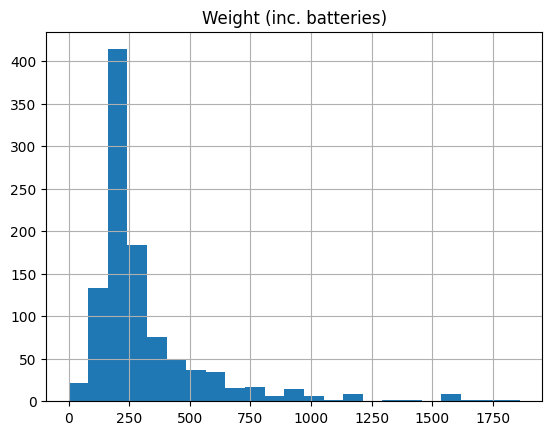

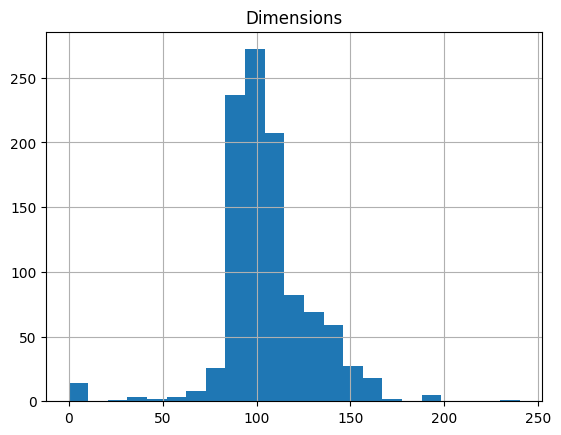

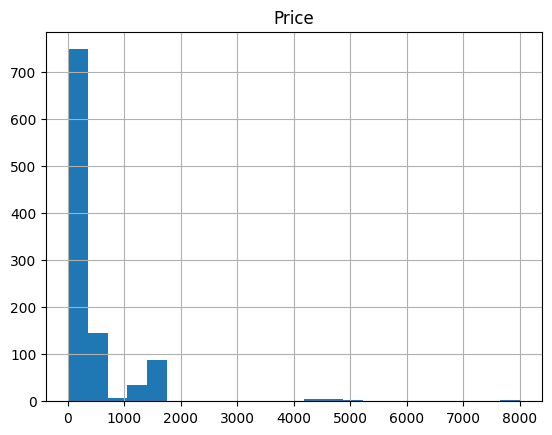

In [2]:
# Loop from 2nd column and plot a histogram
for column in data.columns[1:]:
    n = len(data[column])
    bins = 1 + 3.22 * math.log(n)
    plt.hist(data[column], bins=int(bins))
    plt.title(f'{column}')
    plt.grid(True)
    plt.show()

Task 5

In [3]:
# Loop through each column in dataframe and fill missing values with mode
for column in data:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Save cleaned data to new CSV file
data.to_csv('filled_missing.csv', index=False)

In [4]:
data = pd.read_csv('filled_missing.csv')
all_columns = data.select_dtypes(include=['float64', 'int64']).iloc[:, 1:]

def outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    ls = data.index[(data[column] < lower) | (data[column] > upper)]
    return ls

index_list = []
for i in all_columns:
    index_list.extend(outliers(data, i))

def remove_outliers(data, ls):
    ls = sorted(set(ls)) # remove duplicates and sort
    data = data.drop(ls)
    return data, ls

data, ls = remove_outliers(data, index_list)
print('Number of removed outliers:', len(ls))

# save modified dataset with removed outliers to new CSV file (just to check what the data looks like)
data.to_csv('removed_outliers.csv', index=False)

Number of removed outliers: 533


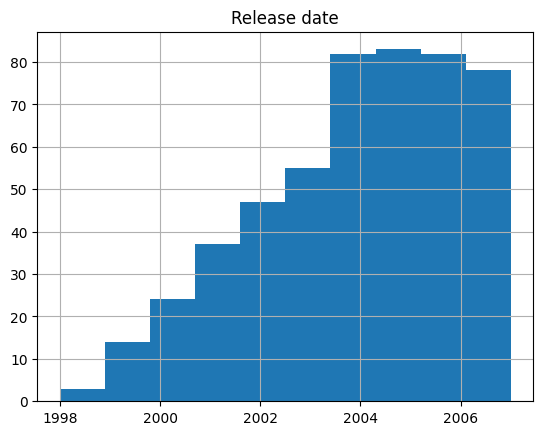

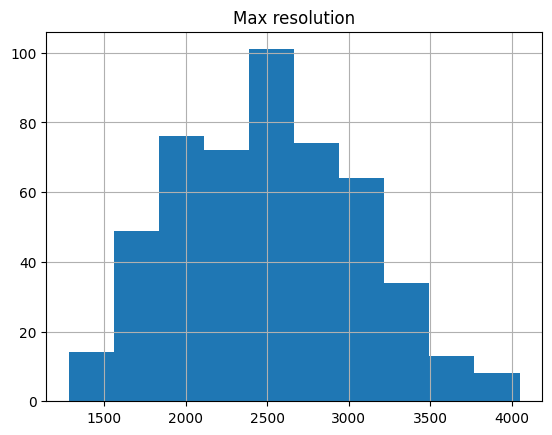

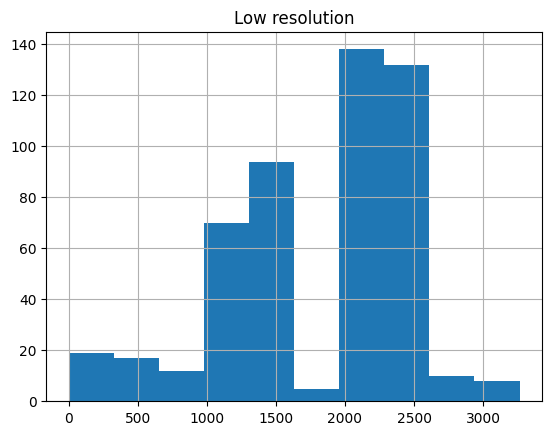

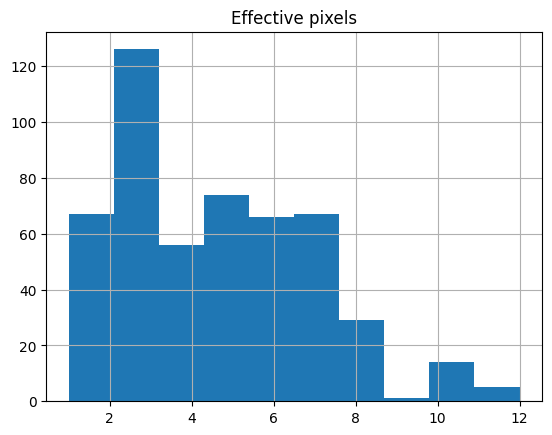

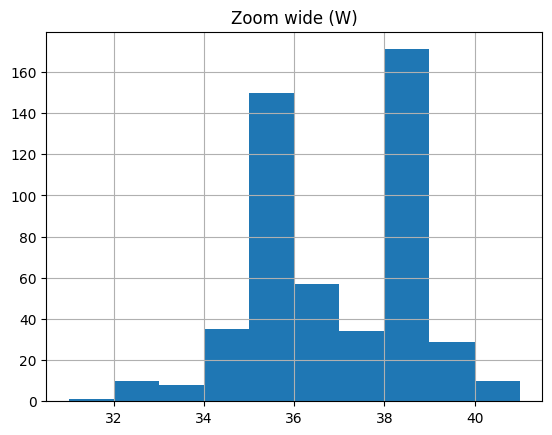

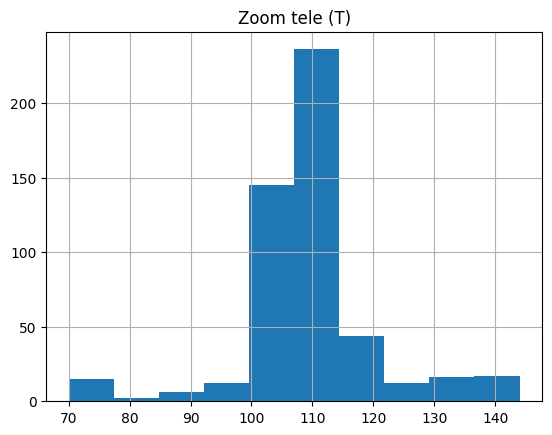

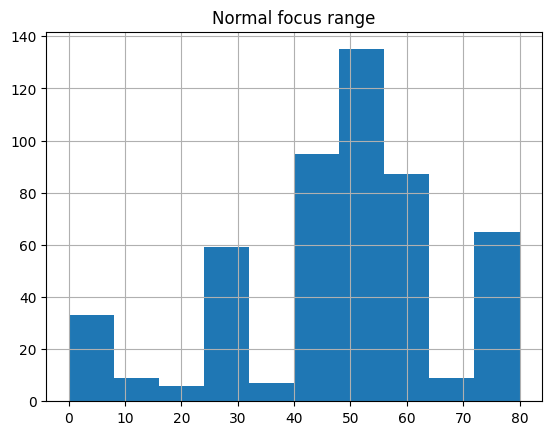

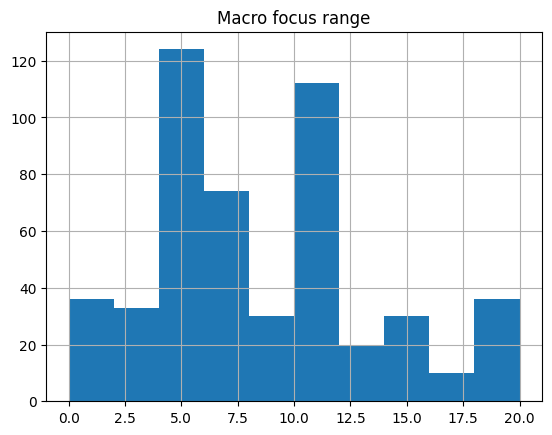

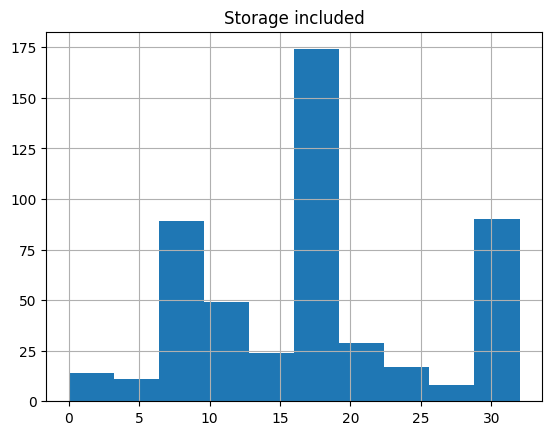

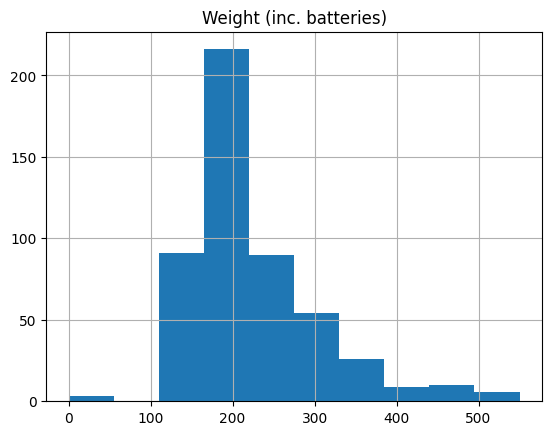

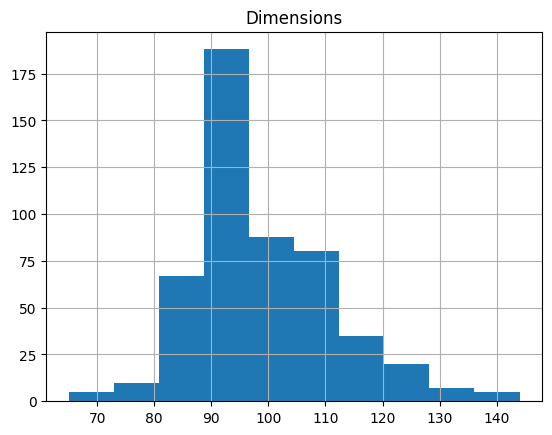

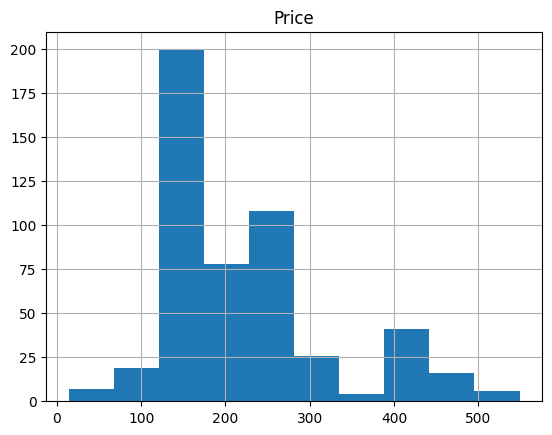

In [5]:
# Loop from 2nd column and plot a histogram
for column in data.columns[1:]:
    n = len(data[column])
    #bins = 1 + 3.22 * math.log(n)
    plt.hist(data[column], bins=10)
    plt.title(f'{column}')
    plt.grid(True)
    plt.show()

Task 6, Continuous

In [6]:
# function to create a scatter plot of two columns
def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.title(f"Scatter plot of {x.name} vs {y.name}")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

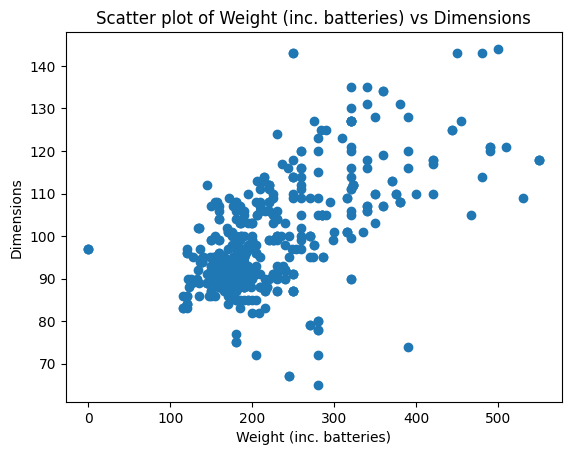

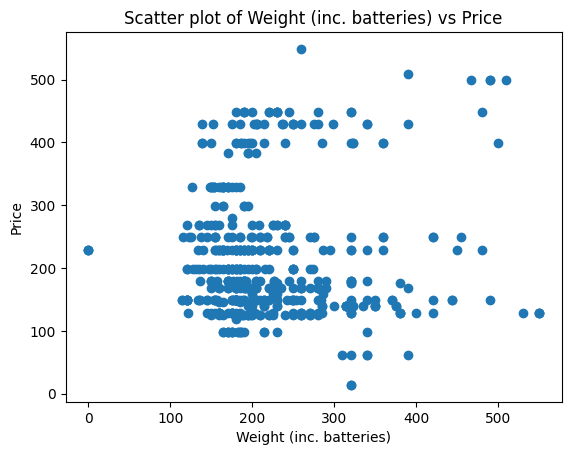

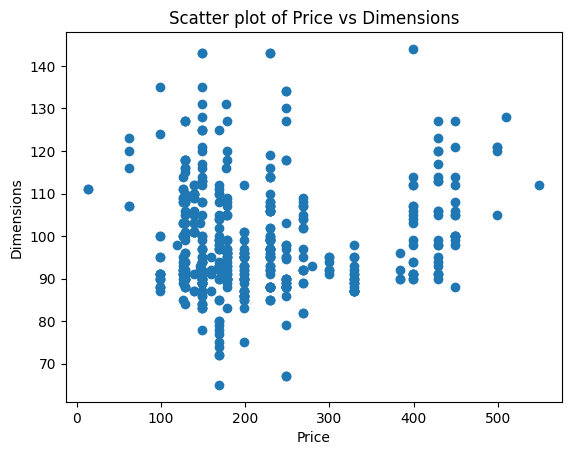

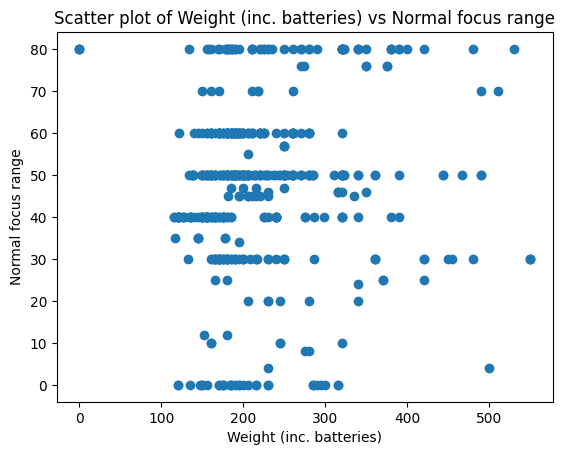

In [7]:
scatter_plot(data['Weight (inc. batteries)'], data['Dimensions'])
scatter_plot(data['Weight (inc. batteries)'], data['Price'])
scatter_plot(data['Price'], data['Dimensions'])
scatter_plot(data['Weight (inc. batteries)'], data['Normal focus range'])

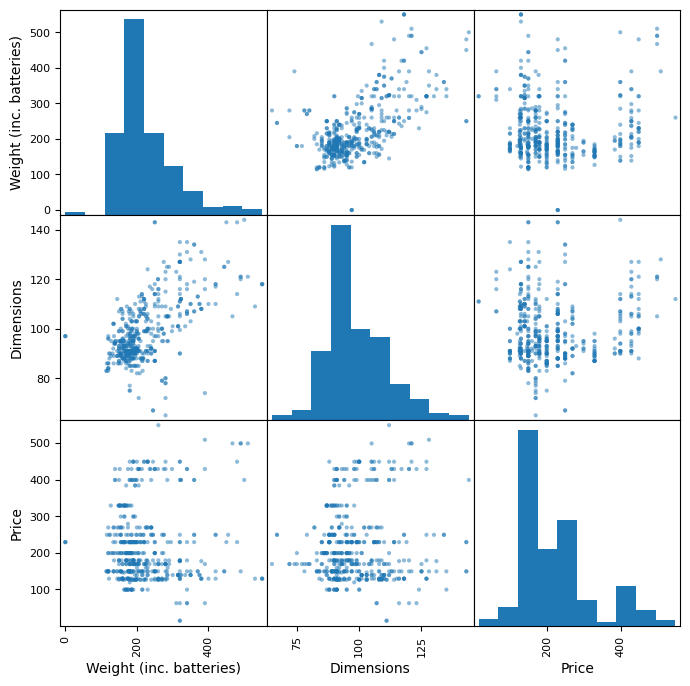

In [8]:
from pandas.plotting import scatter_matrix

# select the columns for the scatter plot matrix
cols_scatter = ['Weight (inc. batteries)', 'Dimensions', 'Price']

# create the scatter plot matrix
scatter_matrix(data[cols_scatter], figsize=(8,8), diagonal='hist')
plt.show()

Task 6, Categorical

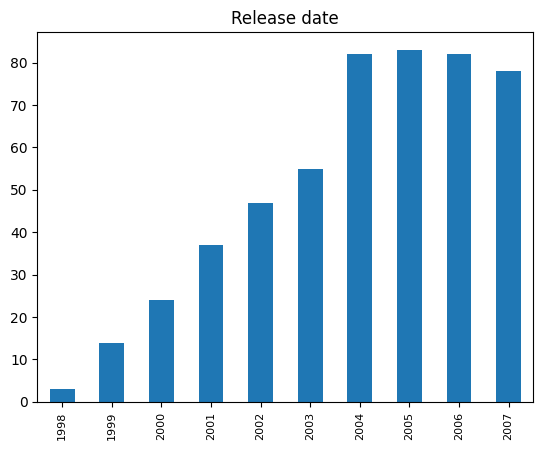

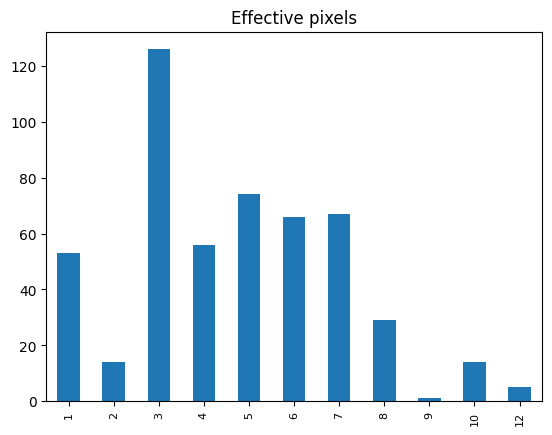

In [9]:
# select the columns for the bar plots
cols = ['Release date', 'Effective pixels']

# loop through the columns and create a separate bar plot for each column
for col in cols:
    # count the frequency of each unique value
    value_counts = data[col].value_counts().sort_index()
    
    # create the bar plot
    ax = value_counts.plot(kind='bar')
    
    # adjust the size of the x-axis labels
    ax.set_xticklabels(value_counts.index, fontsize=8)
    
    # set the title of the plot
    ax.set_title(col)
    
    # display the plot
    plt.show()


In [10]:
def plot_hist(data, x,y ):
    data.groupby(x)[y].hist(alpha=0.6, stacked=True)
    plt.title(f'{y} by {x}')
    #plt.legend()
    plt.ylabel('Frequency')
    plt.show()

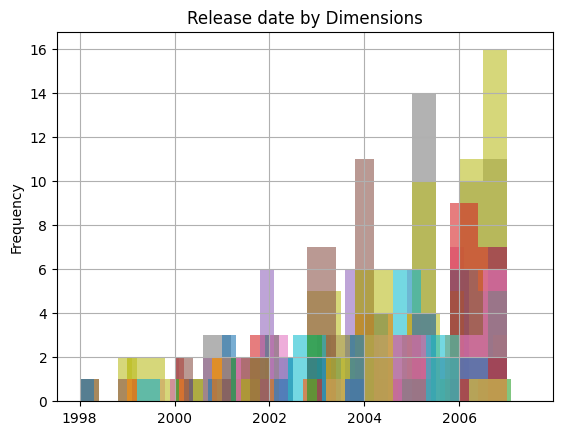

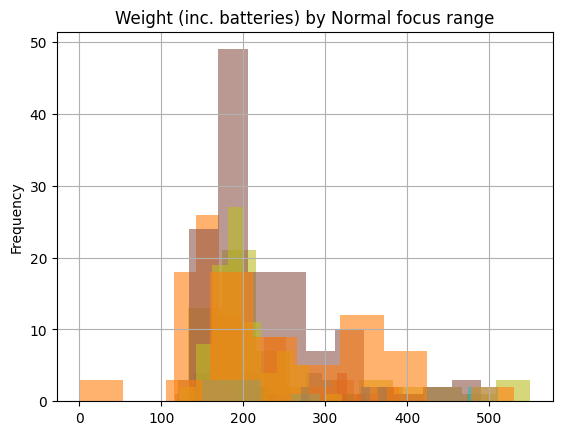

In [11]:
plot_hist(data, 'Dimensions', 'Release date')
plot_hist(data, 'Normal focus range', 'Weight (inc. batteries)')

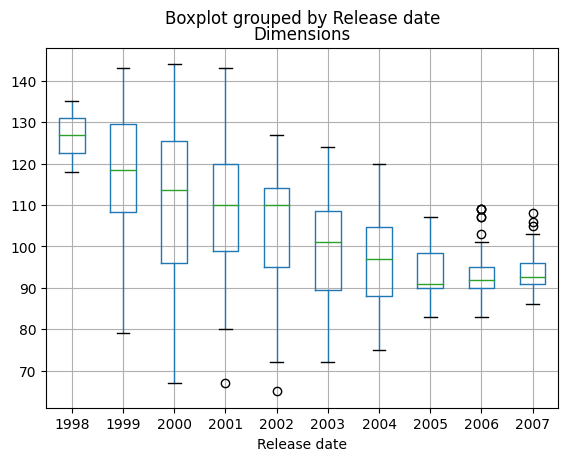

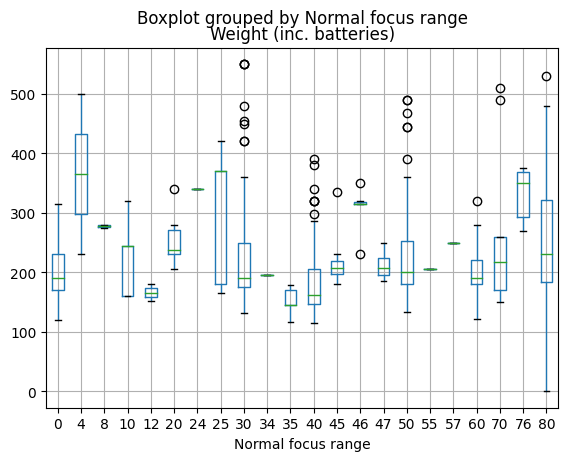

In [12]:
data.boxplot(column='Dimensions', by='Release date')
data.boxplot(column='Weight (inc. batteries)', by='Normal focus range')
plt.show()

Task 7

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data.cov().iloc[9:, 9:]

,Weight (inc. batteries),Dimensions,Price
Weight (inc. batteries),6737.979664,629.380357,327.089258
Dimensions,629.380357,158.510516,94.475000
Price,327.089258,94.475000,10116.976961


In [14]:
data.corr().iloc[9:, 9:]

,Weight (inc. batteries),Dimensions,Price
Weight (inc. batteries),1.000000,0.609003,0.039616
Dimensions,0.609003,1.000000,0.074604
Price,0.039616,0.074604,1.000000


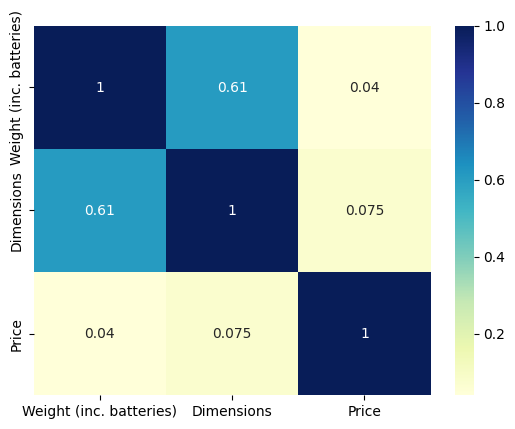

In [15]:
import seaborn as sns
corr = data.corr().iloc[9:, 9:]

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

Task 8

In [16]:
# before normalization
data.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,2004.073267,2522.865347,1841.594059,4.671287,36.437624,110.124752,47.300990,8.083168,16.948515,222.809901,98.700000,216.322772
std,2.239743,565.642325,688.960106,2.308298,1.810620,11.338509,20.004278,5.033323,8.583699,82.085198,12.590096,100.583184
min,1998.000000,1280.000000,0.000000,1.000000,31.000000,70.000000,0.000000,0.000000,0.000000,0.000000,65.000000,14.000000
25%,2003.000000,2048.000000,1600.000000,3.000000,35.000000,105.000000,40.000000,5.000000,10.000000,170.000000,90.000000,149.000000
50%,2004.000000,2569.000000,2048.000000,5.000000,36.000000,111.000000,50.000000,7.000000,16.000000,195.000000,95.000000,179.000000
75%,2006.000000,2848.000000,2304.000000,6.000000,38.000000,114.000000,60.000000,10.000000,22.000000,253.000000,106.000000,249.000000
max,2007.000000,4048.000000,3264.000000,12.000000,41.000000,144.000000,80.000000,20.000000,32.000000,550.000000,144.000000,549.000000


In [17]:
# normalization of all the data in the bounds of 0 and 1
all_columns = data.select_dtypes(include=['float64', 'int64']).iloc[:, 0:]
for i in all_columns:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

# Write the normalized data to a CSV file
data.to_csv('normalized_data.csv', index=False)

# show the resulting normalized data
data.describe()